#### K-means clustering

K-means is a unsupervised machine learning algorithm used for partitioning a dataset into `k` distinct, non-overlapping `clusters` based on feature values

It aims to minimize variance within each cluster, making data points within a cluster more similar to each other than to those in other clusters

* obtain k initial centroids randomly from dataset
* `assign` each data point to the nearest centroid, forming k clusters based on minimizing commonly Euclidean distance between data points and centroids
* `recompute` centroids by computing mean of all data points assigned to each cluster
* repeat

##### Generate data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

(300, 2)


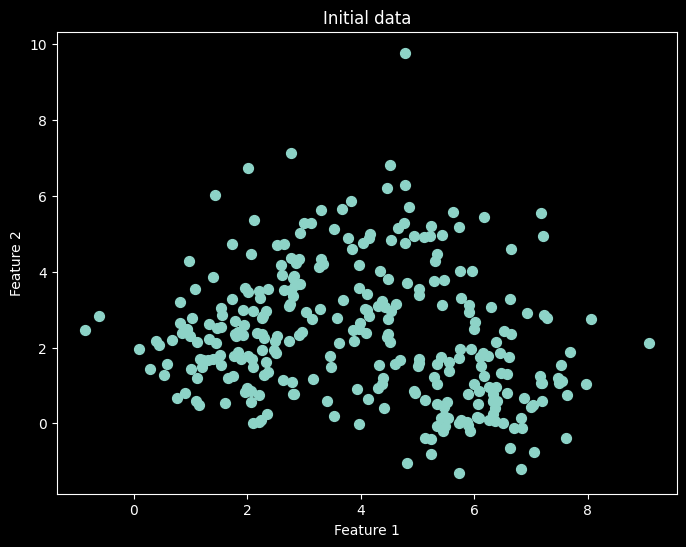

In [ ]:
np.random.seed(42)
centroids = np.array([
    [2, 2],
    [4, 4],
    [6, 1]
])

std_devs = [1, 1.5, 1]

data = np.vstack([
    np.random.normal(loc=centroid, scale=std_dev, size=(100, 2))
    for centroid, std_dev in zip(centroids, std_devs)
])

print(data.shape)

true_labels = np.array([0]*100 + [1]*100 + [2]*100)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title('Initial data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##### Iteration in k-means

Iteration 0:
Centroids:
[[ 8.09e-01  2.66e+00]
 [ 1.46e+00  2.11e+00]
 [ 6.12e+00  1.51e+00]]



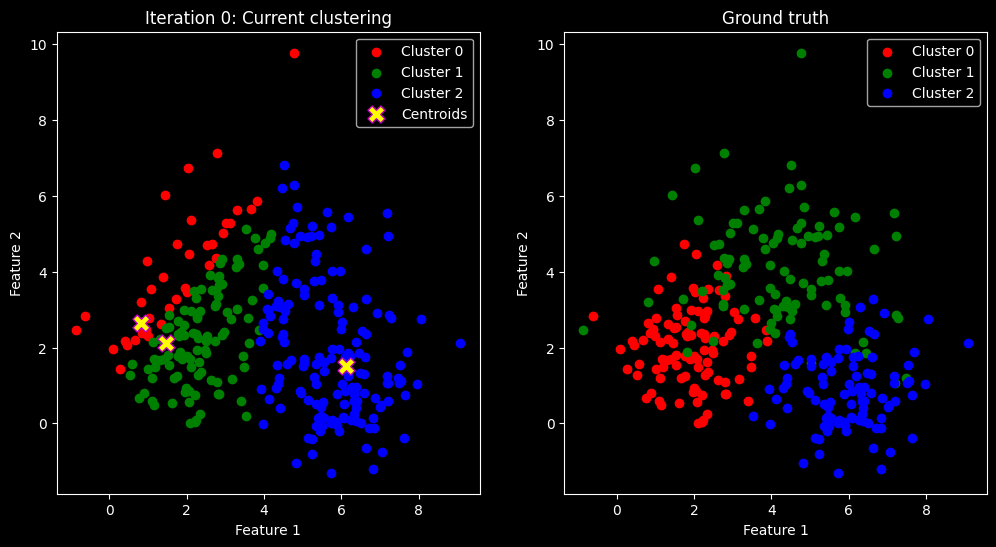

Iteration 1:
Centroids:
[[ 1.69e+00  4.00e+00]
 [ 2.37e+00  2.28e+00]
 [ 5.72e+00  1.93e+00]]



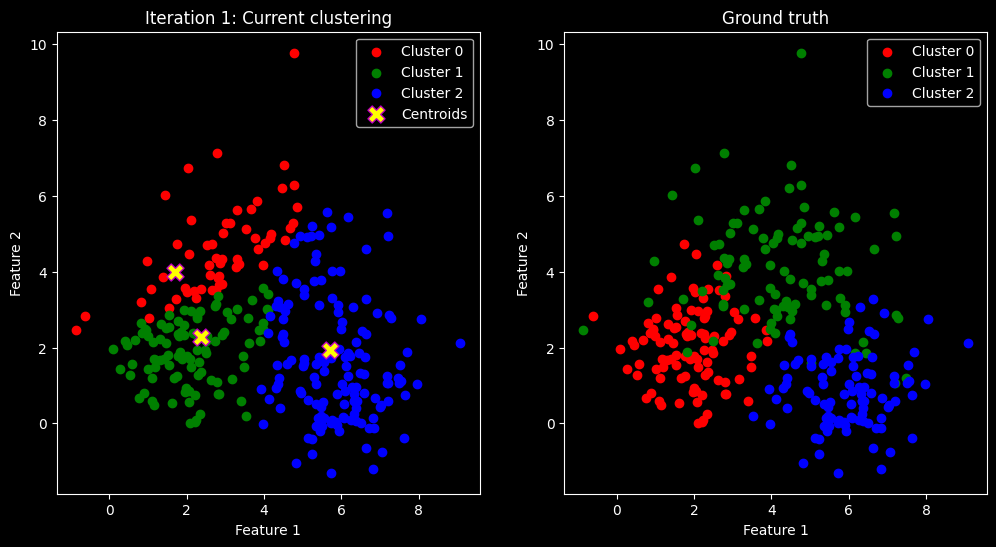

Iteration 2:
Centroids:
[[ 2.81e+00  4.61e+00]
 [ 2.12e+00  1.90e+00]
 [ 5.84e+00  1.71e+00]]



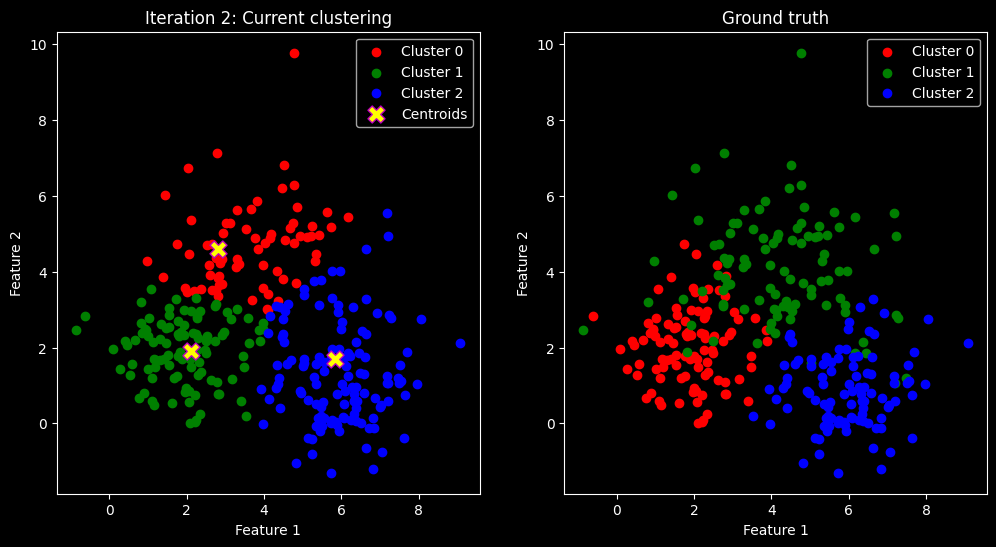

Iteration 3:
Centroids:
[[ 3.61e+00  4.67e+00]
 [ 1.92e+00  1.91e+00]
 [ 5.92e+00  1.36e+00]]



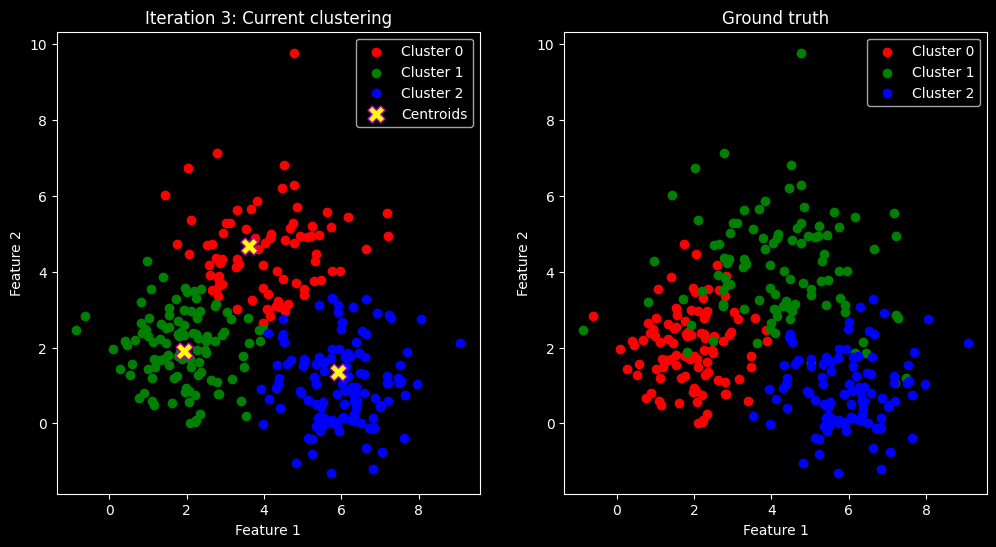

Iteration 4:
Centroids:
[[ 4.06e+00  4.54e+00]
 [ 1.88e+00  2.00e+00]
 [ 5.99e+00  1.06e+00]]



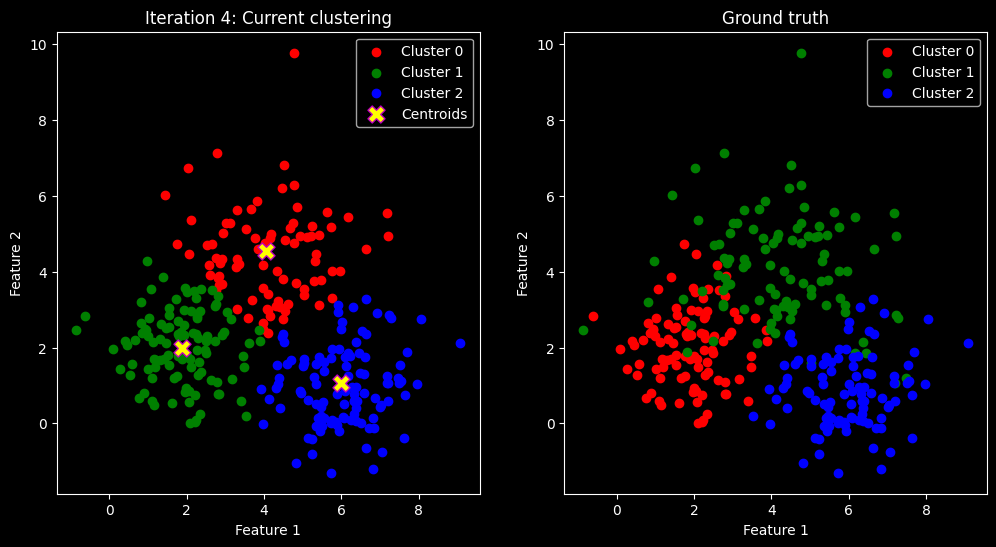

Iteration 5:
Centroids:
[[ 4.13e+00  4.45e+00]
 [ 1.86e+00  2.01e+00]
 [ 6.03e+00  9.96e-01]]



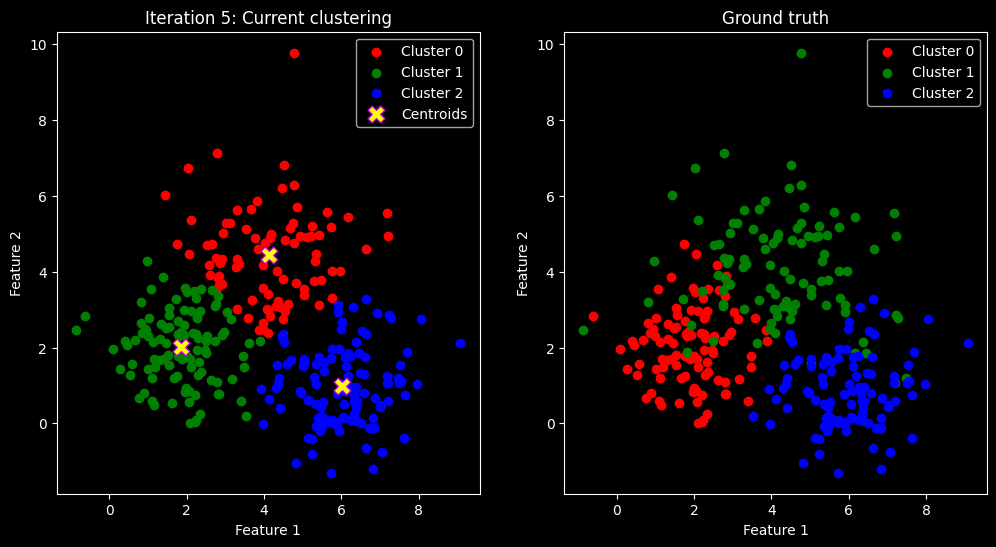

Iteration 6:
Centroids:
[[ 4.13e+00  4.42e+00]
 [ 1.84e+00  2.01e+00]
 [ 6.03e+00  9.96e-01]]



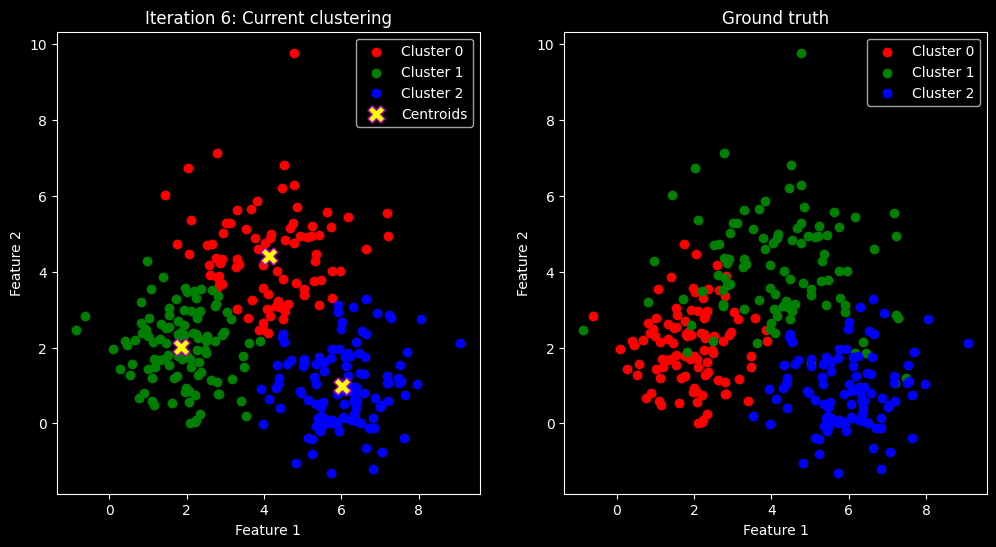

Converged after 6 iterations


In [ ]:
k = 3
max_iters = 100
tol = 1e-4

# Select k data points randomly as initial centroids
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

# Loop
for iter in range(max_iters):

    diff = data.reshape(-1, 1, 2) - centroids
    distances = np.sqrt(np.sum(diff**2, axis=2))

    # Use index of column as index of class to assign cluster for each data points
    labels = np.argmin(distances, axis=1)

    # Update centroids according to assignment
    new_centroids = np.array([data[labels == label].mean(axis=0) for label in range(k)])

    print(f'Iteration {iter}:')
    print(f'Centroids:\n{centroids}\n')

    # Create plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    colors = ['r', 'g', 'b']
    for i in range(k):
        axes[0].scatter(data[labels == i][:, 0], data[labels == i][:, 1], c=colors[i], label=f'Cluster {i}')
    axes[0].scatter(centroids[:, 0], centroids[:, 1], s=150, c='yellow', edgecolors='m', marker='X', label='Centroids')
    axes[0].set_title(f'Iteration {iter}: Current clustering')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].legend()

    # Plot ground truth
    for i in range(k):
        axes[1].scatter(data[true_labels == i][:, 0], data[true_labels == i][:, 1], c=colors[i], label=f'Cluster {i}')
    axes[1].set_title('Ground truth')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].legend()

    plt.show()

    # Check for convergence
    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f'Converged after {iter} iterations')
        break

    centroids = new_centroids

# Final centroids and labels
final_centroids = centroids
final_labels = labels